In [1]:
pip install kneed

**KneeLocator **— это инструмент из библиотеки kneed, который позволяет находить "колено" (или "изгиб") в графике, что часто используется в методе локтя для определения оптимального количества кластеров.

In [2]:
# импортируем необходимые библиотеки и функции
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Импортируем Axes3D
import seaborn as sns
from sklearn.cluster import KMeans
from kneed import KneeLocator

In [3]:
# загружаем данные
data = pd.read_csv('customer_segmentation.csv', sep=';')
data.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,6.3
1,2,47,1,26,100,4.582,8.218,12.8
2,3,33,2,10,57,6.111,5.802,20.9
3,4,29,2,4,19,0.681,0.516,6.3
4,5,47,1,31,253,9.308,8.908,7.2


In [4]:
# удаляем переменную Customer Id
data.drop('Customer Id', axis=1, inplace=True)

In [5]:
# смотрим пропуски и типы переменных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   DebtIncomeRatio  850 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 46.6 KB


In [6]:
# выполняем стандартизацию
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scal_data = scaler.fit_transform(data)

In [7]:
# с помощью "метода локтя" определим оптимальное количество кластеров

# создаем пустой список, в котором будем хранить
# внутрикластерную сумму квадратов –
# within cluster sum of squares (wcss)
wcss_lst = []
# строим KMeans с разным количеством кластеров
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scal_data)
    # атрибут inertia_ возвращает wcss
    wcss_lst.append(kmeans.inertia_)

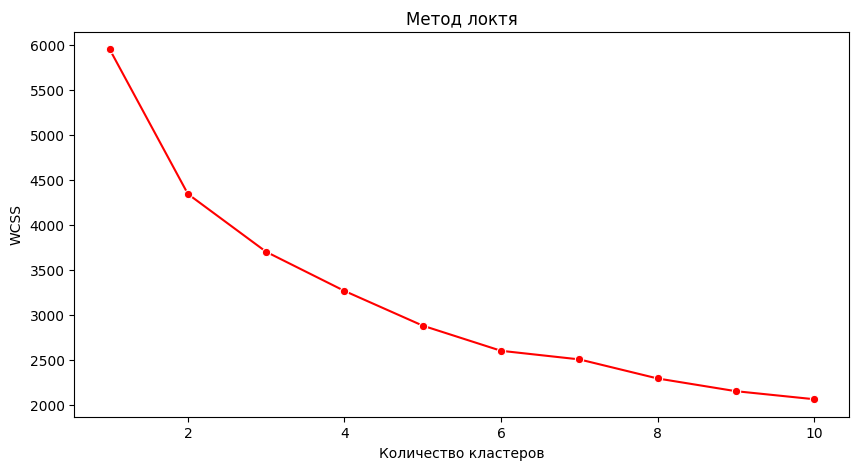

In [8]:
# строим график зависимости внутрикластерной суммы
# квадратов от количества кластеров
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, 11), y=wcss_lst, marker='o', color='red')
plt.title("Метод локтя")
plt.xlabel("Количество кластеров")
plt.ylabel("WCSS")
plt.show()

In [9]:
# оптимальное количество кластеров определяем
# с помощью класса KneeLocator библиотеки kneed
kl = KneeLocator(range(1, 11), wcss_lst,
                 curve='convex', direction='decreasing')
kl.elbow

np.int64(4)

In [10]:
# построим модель с 4 кластерами
kmeans = KMeans(n_clusters=4, random_state=4)
# получаем метки кластеров
labels = kmeans.fit_predict(scal_data)

In [11]:
# посмотрим количество наблюдений в каждом кластере
unique, counts = np.unique(labels, return_counts=True)
dict(zip(unique, counts))

{np.int32(0): np.int64(150),
 np.int32(1): np.int64(490),
 np.int32(2): np.int64(108),
 np.int32(3): np.int64(102)}

In [12]:
# добавляем переменную с метками кластеров
data['Cluster_id'] = labels
data.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio,Cluster_id
0,41,2,6,19,0.124,1.073,6.3,1
1,47,1,26,100,4.582,8.218,12.8,2
2,33,2,10,57,6.111,5.802,20.9,0
3,29,2,4,19,0.681,0.516,6.3,1
4,47,1,31,253,9.308,8.908,7.2,2


In [13]:
# выводим средние значения переменных в каждом кластере
data.groupby('Cluster_id').mean()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
Cluster_id,,,,,,,
0,35.073333,1.646667,8.573333,41.720000,2.987167,5.232433,20.208000
1,33.128571,1.316327,6.969388,33.171429,0.728308,1.541276,7.395102
2,45.009259,1.953704,19.157407,119.000000,4.021898,7.922343,10.767593
3,33.529412,3.441176,5.009804,42.254902,0.990059,2.169157,8.119608


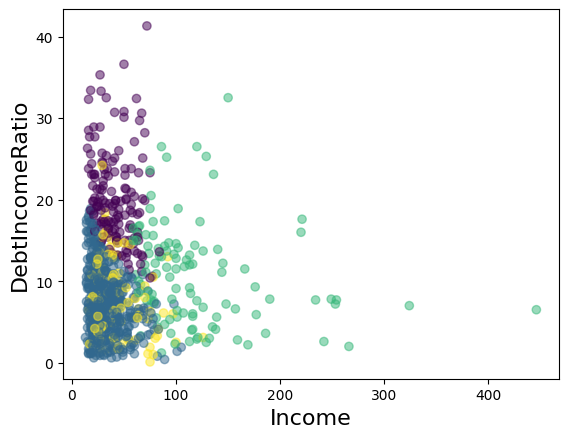

In [14]:
# построим диаграмму рассеяния для Income и DebtIncomeRatio
plt.scatter(data.iloc[:, 3], data.iloc[:, 6], c=labels, alpha=0.5)
plt.xlabel('Income', fontsize=16)
plt.ylabel('DebtIncomeRatio', fontsize=16)

plt.show()

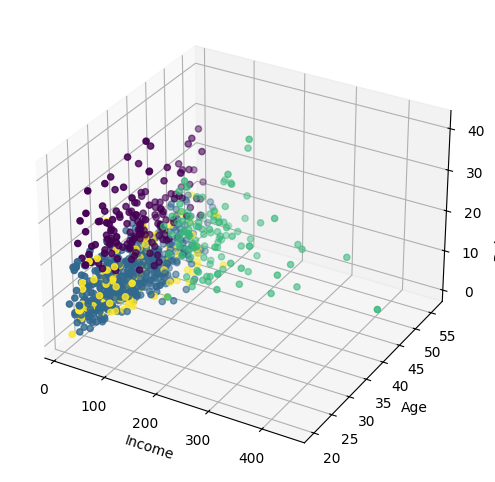

In [15]:
from mpl_toolkits.mplot3d import Axes3D  # Импортируем Axes3D
# построим 3-D диаграмму рассеяния
# для Income, Age и DebtIncomeRatio
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')  # Создаем 3D оси

ax.set_xlabel('Income')
ax.set_ylabel('Age')
ax.set_zlabel('DebtIncomeRatio')

# Предполагаем, что данные находятся в определенных столбцах
ax.scatter(data.iloc[:, 3], data.iloc[:, 0], data.iloc[:, 6], c=labels)

plt.show()